In [115]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt
import csv
import os

In [116]:
input_folder="dataset/graph_adj_matrix"

In [117]:
def read_adjacency_matrix(file_path):
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        matrix = list(reader)
    
    return np.array(matrix, dtype=int)

In [118]:
def create_graph(adj_matrix):
    G=nx.DiGraph()
    num_nodes=adj_matrix.shape[0]
    G.add_nodes_from(range(num_nodes))

    for i in range(num_nodes):
        for j in range(num_nodes):
            if adj_matrix[i][j]!=0:
                G.add_edge(i,j)
    return G            

In [119]:
def hierarchical_layout(G):
    # Identify root nodes (nodes with in-degree 0)
    roots = [n for n in G.nodes() if G.in_degree(n) == 0]
    
    if not roots:
        # If no root found, use the node with the lowest in-degree
        roots = [min(G.nodes(), key=lambda n: G.in_degree(n))]

    # Create a hierarchical layout
    pos = {}
    visited = set()

    def dfs_layout(node, depth, pos_x):
        if node in visited:
            return pos_x

        visited.add(node)
        pos[node] = (pos_x, -depth)

        children = list(G.successors(node))
        width = max(len(children), 1)
        for i, child in enumerate(children):
            pos_x = dfs_layout(child, depth + 1, pos_x + i / width)

        return pos_x + 1

    # Apply layout for each root
    x_offset = 0
    for root in roots:
        x_offset = dfs_layout(root, 0, x_offset) + 1

    return pos

In [120]:
def centered_tree_layout(G):
    def tree_layout(node, x, y, hspace, vspace, level_width):
        pos[node] = (x, y)
        children = list(G.successors(node))
        if not children:
            return x
        
        if len(children) == 1:
            return tree_layout(children[0], x, y - vspace, hspace, vspace, level_width * 0.8)
        
        start_x = x - (len(children) - 1) * hspace / 2
        max_x = start_x
        for i, child in enumerate(children):
            child_x = start_x + i * hspace
            max_x = max(max_x, tree_layout(child, child_x, y - vspace, hspace * 0.8, vspace, level_width * 0.8))
        return max_x

    pos = {}
    roots = [n for n in G.nodes() if G.in_degree(n) == 0]
    if not roots:
        roots = [0]  # If no root found, use node 0 as root

    hspace = 1
    vspace = 1
    for i, root in enumerate(roots):
        tree_layout(root, i * 4, 0, hspace, vspace, 1)

    return pos

In [121]:
def draw_graph(G, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    pos = centered_tree_layout(G)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=200, ax=ax)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=10, ax=ax)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", ax=ax)
    
    ax.set_title(title, fontsize=16)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

In [122]:
# def draw_graph(G,title):
#     fig, ax = plt.subplots(figsize=(10, 8))
#     pos = nx.spring_layout(G)
#     nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightblue',
#             node_size=300, arrowsize=10, arrows=True)
#     ax.set_title(title)
#     plt.show()

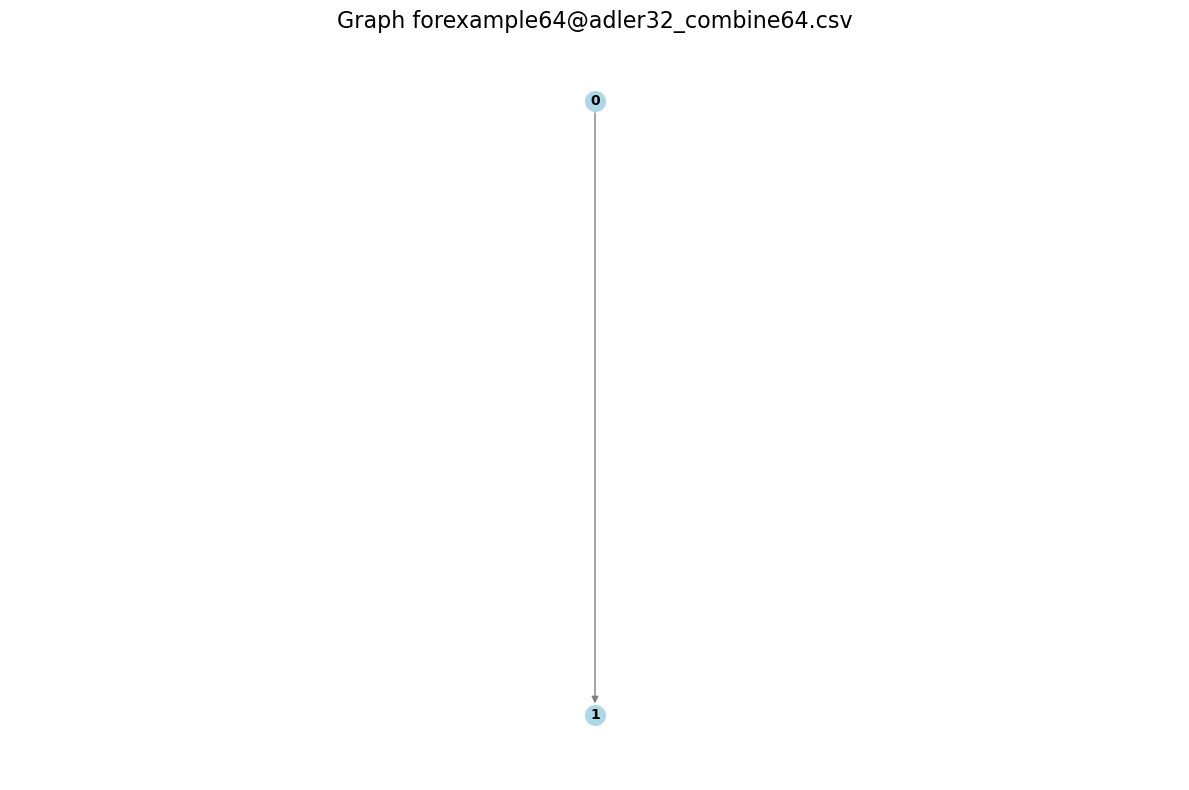

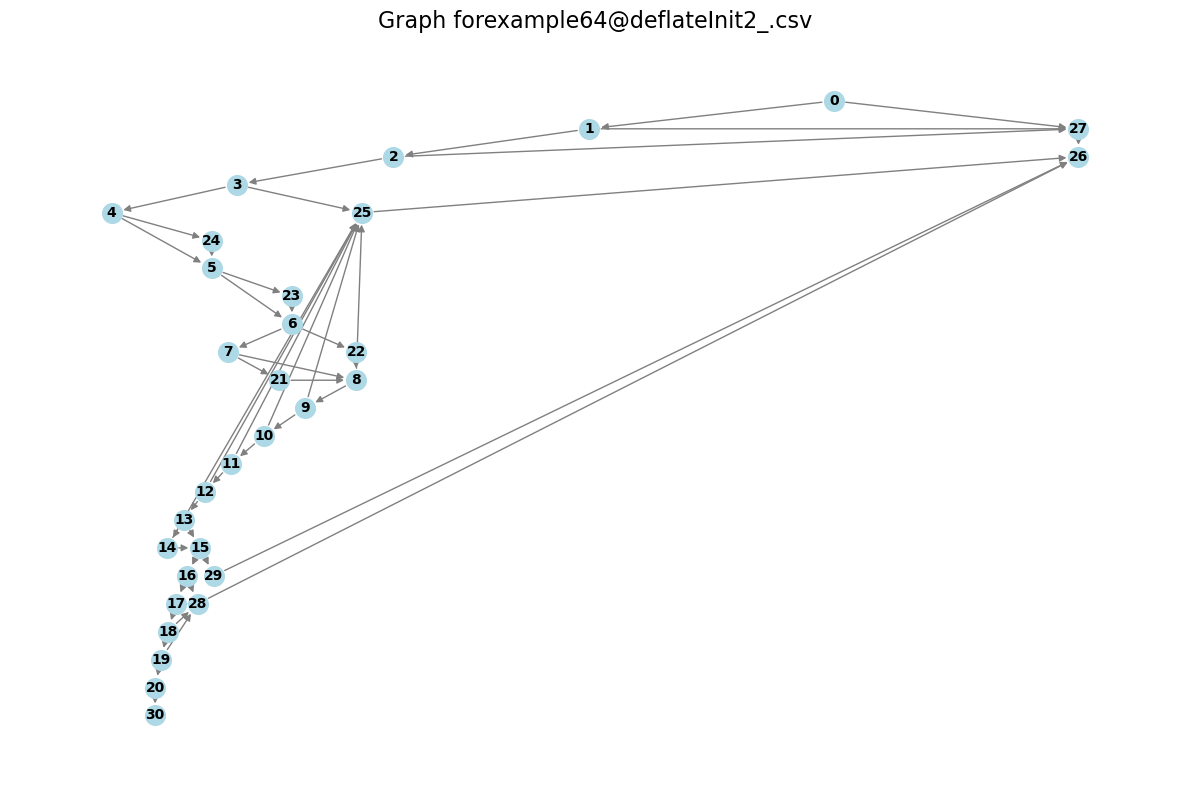

In [123]:
filenames=os.listdir(input_folder)
for file in filenames:
    if file.endswith('.csv'):
        file_path=os.path.join(input_folder,file)
        adj_matrix=read_adjacency_matrix(file_path)
        G=create_graph(adj_matrix)
        draw_graph(G,f"Graph for{file}")